# March Madness 2019 

## Data Science Club 

#### Data from Kaggle Competition, site: https://www.kaggle.com/c/mens-machine-learning-competition-2019
#### There are many datasets in this challenge (about 20 total), so it is useful to do some exploration before jumping into any major analyses

In [2]:
import pandas as pd
Event = pd.read_csv("/Users/ericenglin/Desktop/Data Science Club/DataFiles/PlayByPlay_2010/Events_2010.csv")

In [3]:
import matplotlib.style as style
pd.options.display.max_columns = None

In [14]:
import pandas as pd
from dplython import (DplyFrame, X, select, sift, sample_n,
    sample_frac, head, arrange, mutate, group_by, summarize) 

In [25]:
# Then, cast the data frame to become a DplyFrame using the DplyFrame() function
Event = DplyFrame(Event)

In [4]:
Event.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WPoints,LPoints,ElapsedSeconds,EventTeamID,EventPlayerID,EventType
0,1,2010,7,1143,1293,0,0,0,1143,600578,sub_in
1,2,2010,7,1143,1293,0,0,0,1143,600584,sub_in
2,3,2010,7,1143,1293,0,0,0,1143,600585,sub_in
3,4,2010,7,1143,1293,0,0,10,1143,600581,miss2_lay
4,5,2010,7,1143,1293,0,0,10,1143,600581,reb_off


In [5]:
Event.shape

(2502630, 11)

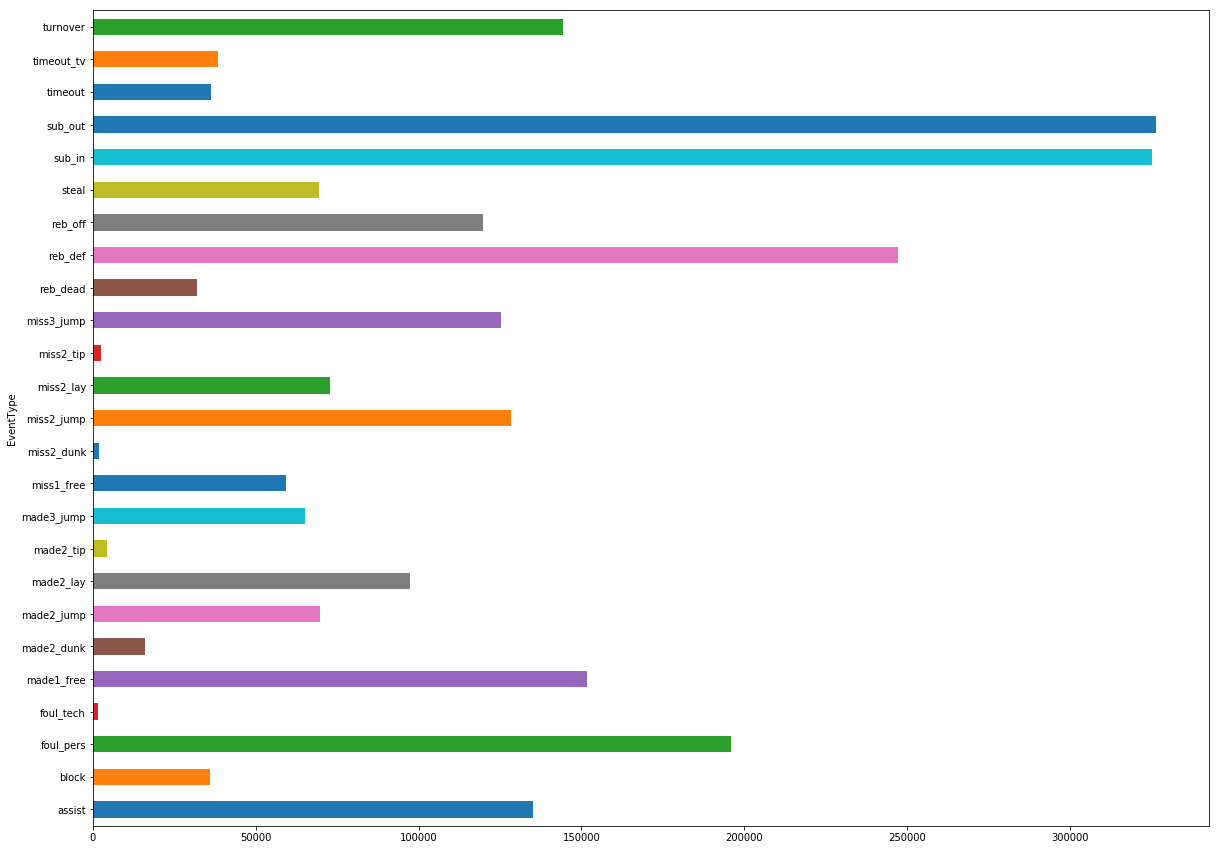

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

Event.groupby("EventType").size().plot(kind='barh')

In [18]:
Event.head(15)

,EventID,Season,DayNum,WTeamID,LTeamID,WPoints,LPoints,ElapsedSeconds,EventTeamID,EventPlayerID,EventType
0,1,2010,7,1143,1293,0,0,0,1143,600578,sub_in
1,2,2010,7,1143,1293,0,0,0,1143,600584,sub_in
2,3,2010,7,1143,1293,0,0,0,1143,600585,sub_in
3,4,2010,7,1143,1293,0,0,10,1143,600581,miss2_lay
4,5,2010,7,1143,1293,0,0,10,1143,600581,reb_off
5,6,2010,7,1143,1293,2,0,14,1143,600581,made2_jump
6,7,2010,7,1143,1293,0,0,36,1293,602791,miss2_jump
7,8,2010,7,1143,1293,0,0,36,1293,602781,reb_off
8,9,2010,7,1143,1293,2,2,40,1293,602781,made2_jump
9,10,2010,7,1143,1293,0,0,56,1143,600577,assist


In [30]:
NonEvent = ['sub_in', 'sub_out','timeout','timeout_tv','miss1_free','made1_free']

In [51]:
New_Event = Event[~Event.EventType.isin(NonEvent)]
New_Event.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WPoints,LPoints,ElapsedSeconds,EventTeamID,EventPlayerID,EventType
3,4,2010,7,1143,1293,0,0,10,1143,600581,miss2_lay
4,5,2010,7,1143,1293,0,0,10,1143,600581,reb_off
5,6,2010,7,1143,1293,2,0,14,1143,600581,made2_jump
6,7,2010,7,1143,1293,0,0,36,1293,602791,miss2_jump
7,8,2010,7,1143,1293,0,0,36,1293,602781,reb_off


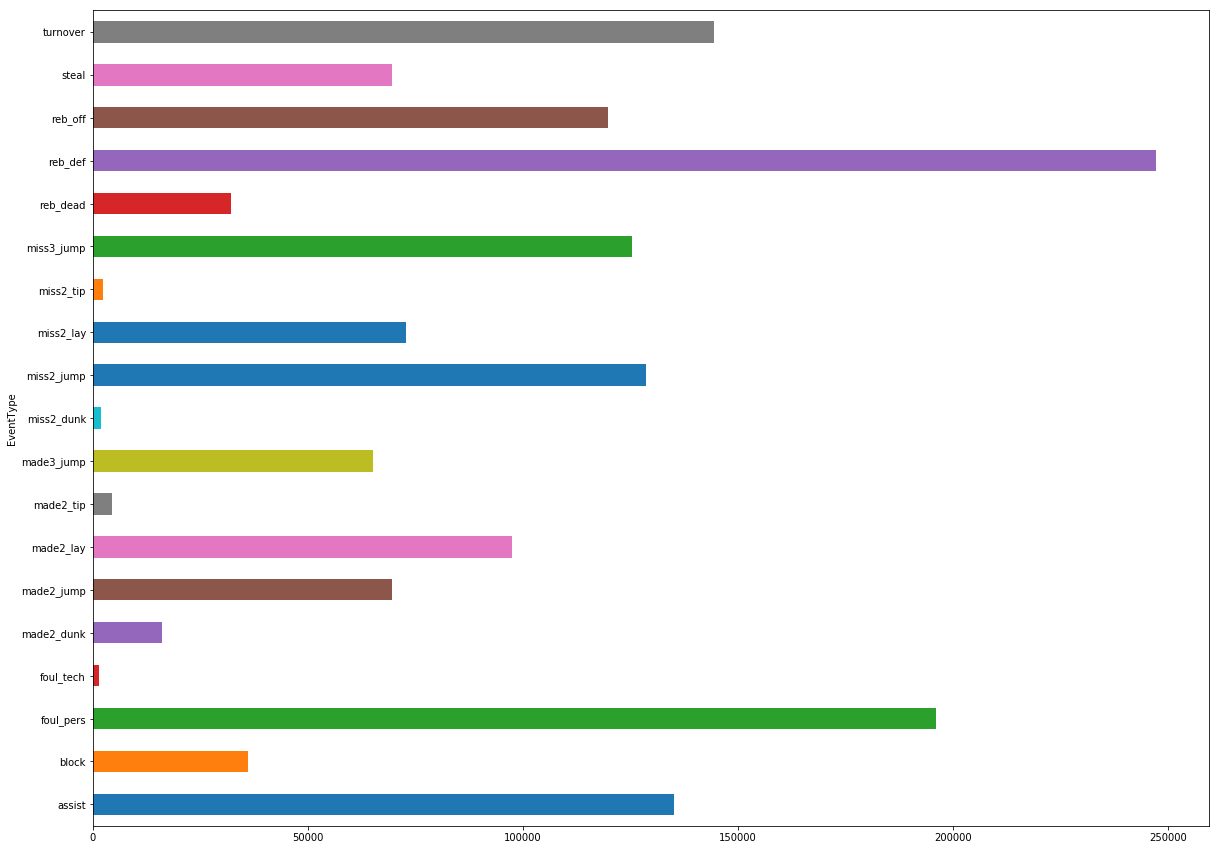

In [52]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

New_Event.groupby("EventType").size().plot(kind='barh')

In [53]:
New_Event = (New_Event >> 
     mutate(Turnovers = X.EventType == 'turnover'))

In [54]:
New_Event.head(10)

,EventID,Season,DayNum,WTeamID,LTeamID,WPoints,LPoints,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,Turnovers
3,4,2010,7,1143,1293,0,0,10,1143,600581,miss2_lay,False
4,5,2010,7,1143,1293,0,0,10,1143,600581,reb_off,False
5,6,2010,7,1143,1293,2,0,14,1143,600581,made2_jump,False
6,7,2010,7,1143,1293,0,0,36,1293,602791,miss2_jump,False
7,8,2010,7,1143,1293,0,0,36,1293,602781,reb_off,False
8,9,2010,7,1143,1293,2,2,40,1293,602781,made2_jump,False
9,10,2010,7,1143,1293,0,0,56,1143,600577,assist,False
10,11,2010,7,1143,1293,4,2,56,1143,600581,made2_jump,False
11,12,2010,7,1143,1293,0,0,72,1293,602791,assist,False
12,13,2010,7,1143,1293,4,5,72,1293,602787,made3_jump,False


In [58]:
Win_Nums = (New_Event >> 
             group_by(X.WTeamID, X.Season) >>
             summarize(Possessions = X.EventType.count(),
                        Turnovers = X.Turnovers.sum()))

In [59]:
Win_Nums.head(5)

,WTeamID,Season,Possessions,Turnovers
0,1102,2010,2134,192
1,1103,2010,6871,656
2,1104,2010,5064,468
3,1105,2010,2716,278
4,1106,2010,3986,420


In [60]:
Lose_Nums = (New_Event >> 
             group_by(X.LTeamID, X.Season) >>
             summarize(Possessions = X.EventType.count(),
                        Turnovers = X.Turnovers.sum()))

In [63]:
Lose_Nums.tail(150)

,LTeamID,Season,Possessions,Turnovers
196,1311,2010,4999,535
197,1312,2010,6351,620
198,1313,2010,5981,599
199,1314,2010,4943,425
200,1315,2010,6396,642
201,1316,2010,5245,510
202,1317,2010,2653,241
203,1318,2010,3630,344
204,1319,2010,4104,399
205,1320,2010,1295,107


In [43]:
Teams = pd.read_csv("/Users/ericenglin/Desktop/Data Science Club/DataFiles/Teams.csv")

In [44]:
Teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2019
1,1102,Air Force,1985,2019
2,1103,Akron,1985,2019
3,1104,Alabama,1985,2019
4,1105,Alabama A&M,2000,2019


In [4]:
Players = pd.read_csv("/Users/ericenglin/Desktop/Data Science Club/DataFiles/PlayByPlay_2010/Players_2010.csv")

In [5]:
Players.head()

,PlayerID,Season,TeamID,PlayerName
0,600001,2010,1102,BOHANNON_ZACH
1,600002,2010,1102,BRAKEVILLE_ADAM
2,600003,2010,1102,BROEKHUIS_TAYLOR
3,600004,2010,1102,BROOKS_DEREK
4,600005,2010,1102,EL-AMIN_SAJ


In [11]:
Season_Results = pd.read_csv("/Users/ericenglin/Desktop/Data Science Club/DataFiles/RegularSeasonDetailedResults.csv")

In [21]:
Season_Results.tail()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
82036,2018,132,1153,56,1222,55,N,0,20,46,4,14,12,19,9,24,8,13,4,5,13,19,55,7,23,10,12,9,20,12,12,8,2,19
82037,2018,132,1172,58,1348,57,N,0,19,50,6,18,14,16,6,26,9,12,4,4,14,20,52,8,23,9,17,11,26,12,14,3,4,16
82038,2018,132,1209,74,1426,61,N,0,25,56,8,17,16,20,8,23,9,8,12,5,21,17,57,4,25,23,28,19,24,9,13,1,5,16
82039,2018,132,1246,77,1397,72,N,0,25,50,7,16,20,24,11,21,9,10,6,6,19,23,62,10,27,16,20,18,16,14,10,4,3,21
82040,2018,132,1335,68,1217,65,N,0,24,52,8,18,12,16,3,27,10,7,3,3,14,23,55,7,18,12,12,5,29,6,8,2,2,17


In [26]:
Season_Results.shape

(82041, 34)

In [17]:
Season_Results.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.00000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000,82041.000000
mean,2010.735047,71.355676,1287.229154,75.265916,1281.662242,63.281201,0.072890,26.037286,55.038334,7.031301,18.335125,16.160042,22.776124,10.969869,25.586134,14.731476,13.020453,7.032313,3.839288,17.487317,22.537146,56.286796,5.99744,19.337539,12.209468,18.094258,11.188247,21.534257,11.434831,14.358418,6.026304,2.870845,19.827172
std,4.562834,35.251659,104.857118,11.141337,103.935852,10.972665,0.315149,4.701946,7.585434,3.045754,5.762968,6.256617,8.133670,4.140631,4.898651,4.412752,4.035338,3.136842,2.470696,4.138770,4.387217,7.706462,2.76101,5.896804,5.372825,7.154317,4.211062,4.529824,3.732018,4.421789,2.770446,2.040549,4.527265
min,2003.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000,10.000000,27.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,3.000000,6.000000,26.000000,0.00000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,2007.000000,40.000000,1198.000000,68.000000,1191.000000,56.000000,0.000000,23.000000,50.000000,5.000000,14.000000,12.000000,17.000000,8.000000,22.000000,12.000000,10.000000,5.000000,2.000000,15.000000,20.000000,51.000000,4.00000,15.000000,8.000000,13.000000,8.000000,18.000000,9.000000,11.000000,4.000000,1.000000,17.000000
50%,2011.000000,75.000000,1286.000000,75.000000,1280.000000,63.000000,0.000000,26.000000,55.000000,7.000000,18.000000,16.000000,22.000000,11.000000,25.000000,14.000000,13.000000,7.000000,3.000000,17.000000,22.000000,56.000000,6.00000,19.000000,12.000000,18.000000,11.000000,21.000000,11.000000,14.000000,6.000000,3.000000,20.000000
75%,2015.000000,102.000000,1379.000000,82.000000,1373.000000,70.000000,0.000000,29.000000,60.000000,9.000000,22.000000,20.000000,28.000000,14.000000,29.000000,17.000000,16.000000,9.000000,5.000000,20.000000,25.000000,61.000000,8.00000,23.000000,16.000000,23.000000,14.000000,24.000000,14.000000,17.000000,8.000000,4.000000,23.000000
max,2018.000000,132.000000,1464.000000,144.000000,1464.000000,140.000000,6.000000,56.000000,103.000000,26.000000,56.000000,48.000000,67.000000,38.000000,53.000000,40.000000,33.000000,26.000000,21.000000,41.000000,47.000000,106.000000,22.00000,58.000000,42.000000,61.000000,36.000000,49.000000,31.000000,41.000000,22.000000,18.000000,45.000000


In [53]:
Season_Results['TeamID']=Season_Results['WTeamID']
Season_Results= pd.merge(Season_Results, Teams, on='TeamID')

Season_Results.head(5)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,TeamId,TeamID,TeamName,FirstD1Season,LastD1Season
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,1104,1104,Alabama,1985,2019
1,2003,18,1104,82,1106,56,H,0,24,49,10,20,24,34,12,26,13,13,7,3,14,19,55,8,21,10,12,11,18,8,15,6,2,22,1104,1104,Alabama,1985,2019
2,2003,21,1104,80,1292,65,H,0,27,59,8,24,18,23,10,24,16,13,10,6,13,25,66,7,23,8,10,17,25,11,21,6,2,20,1104,1104,Alabama,1985,2019
3,2003,25,1104,54,1326,48,N,0,16,57,7,25,15,21,17,26,12,13,6,6,21,16,50,2,6,14,22,10,27,12,13,3,5,19,1104,1104,Alabama,1985,2019
4,2003,29,1104,89,1422,61,H,0,34,70,9,22,12,15,16,30,16,10,10,4,17,23,61,7,18,8,14,11,21,11,13,2,3,15,1104,1104,Alabama,1985,2019


In [102]:
Win = Season_Results.groupby(["TeamName","Season"]).sum()

In [84]:
type(Win)

pandas.core.frame.DataFrame